**Paleontology Meets Computing**


Only five scientists have ever won two Nobel Prizes. One of them is Frederick Sanger, whose assembly of the first genome in 1977 we mentioned in a previous chapter. Yet Sanger had already won his first Nobel prize two decades earlier for determining the sequence of 52 amino acids making up insulin, the protein needed to absorb glucose in the blood. Similarly to how scientists sequence genomes, Sanger broke multiple molecules of insulin into short peptides, sequenced these peptides, and then assembled them into the amino acid sequence of insulin .

This idea motivates a graph-based approach to solving the Decoding an Ideal Spectrum Problem. We represent the masses in a spectrum as a sequence Spectrum of integers s1, . . . , sm in increasing order, where s1 is zero and sm is the total mass of the (unknown) peptide. We define a labeled graph Graph(Spectrum) by forming a node for each element of Spectrum, then connecting nodes si and sj by a directed edge labeled by an amino acid a if sj − si is equal to the mass of a (see figure below). As we assumed when sequencing antibiotics, we do not distinguish between amino acids having the same integer masses (i.e., the pairs K/Q and I/L).

Code Challenge: Construct the graph of a spectrum.

- Input: A space-delimited list of integers Spectrum.
- Output: Graph(Spectrum).

Note: Throughout this chapter, all dataset problems implicitly use the standard integer-valued mass table for the regular twenty amino acids. Examples sometimes use the toy amino acid alphabet {X, Z} whose masses are 4 and 5, respectively.



```
# Sample Input:
57 71 154 185 301 332 415 429 486

Sample Output:
0->57:G
0->71:A
57->154:P
57->185:K
71->185:N
154->301:F
185->332:F
301->415:N
301->429:K
332->429:P
415->486:A
429->486:G
```



In [ ]:
# Dictionnaire des masses d'acides aminés
def AminoAcidMassDict(self):
        massTable = '''
G 57
A 71
S 87
P 97
V 99
T 101
C 103
I 113
L 113
N 114
D 115
K 128
Q 128
E 129
M 131
H 137
F 147
R 156
Y 163
W 186'''
        mass = massTable.split()
        return {int(mass[i+1]):mass[i] for i in range(0, len(mass), 2)}, {mass[i]:int(mass[i+1]) for i in range(0, len(mass), 2)}

# Inverser le dictionnaire pour trouver l'acide aminé à partir de sa masse
mass_to_amino_acid = {mass: aa for aa, mass in amino_acid_mass.items()}

# Entrée : liste des masses du spectre
spectrum = [97, 113, 276, 283, 370, 389, 498, 518, 585, 681, 699, 752, 802, 853, 958, 981, 1094, 1121, 1280, 1284, 1443, 1470, 1583, 1606, 1711, 1762, 1812, 1865, 1883, 1979, 2046, 2066, 2175, 2194, 2281, 2288, 2451, 2467, 2564]


# Liste pour stocker les résultats
graph = []


In [ ]:
def construct_graph(spectrum):
  graph = []
  for number_mass in range(len(spectrum)):
    if spectrum[number_mass] in mass_to_amino_acid:
      graph.append(f"{'0'}->{spectrum[number_mass]}:{mass_to_amino_acid[spectrum[number_mass]]}")
    else:
      for i in range(number_mass):
        if spectrum[number_mass] - spectrum[i] in mass_to_amino_acid:
          graph.append(f"{spectrum[i]}->{spectrum[number_mass]}:{mass_to_amino_acid[spectrum[number_mass] - spectrum[i]]}")

  return graph

graph = construct_graph(spectrum)
for edge in graph:
  print(edge)



0->97:P
0->113:L
113->276:Y
97->283:W
283->370:S
276->389:L
370->498:Q
389->518:E
498->585:S
518->681:Y
585->699:N
681->752:A
699->802:C
752->853:T
802->958:R
853->981:Q
981->1094:L
958->1121:Y
1094->1280:W
1121->1284:Y
1280->1443:Y
1284->1470:W
1470->1583:L
1443->1606:Y
1583->1711:Q
1606->1762:R
1711->1812:T
1762->1865:C
1812->1883:A
1865->1979:N
1883->2046:Y
1979->2066:S
2046->2175:E
2066->2194:Q
2194->2281:S
2175->2288:L
2288->2451:Y
2281->2467:W
2451->2564:L
2467->2564:P


Code Challenge: Solve the Decoding an Ideal Spectrum Problem.

- Input: A space-delimited list of integers Spectrum.
- Output: An amino acid string that explains Spectrum.

Spectrum to list

In [ ]:
import numpy as np

# Dictionnaire des masses d'acides aminés
def AminoAcidMassDict():
    massTable = '''
G 57
A 71
S 87
P 97
V 99
T 101
C 103
I 113
L 113
N 114
D 115
K 128
Q 128
E 129
M 131
H 137
F 147
R 156
Y 163
W 186'''
    mass = massTable.split()
    return {int(mass[i+1]): mass[i] for i in range(0, len(mass), 2)}, {mass[i]: int(mass[i+1]) for i in range(0, len(mass), 2)}

class IdealSpectrumDecoder:
    def __init__(self, sp_str):
        self.mass_to_amino_acid, self.amino_acid_to_mass = AminoAcidMassDict()
        spectrum = self.spectrum_to_list(sp_str)
        graph = self.construct_graph(spectrum)
        peptide = self.DecodingIdealSpectrum(spectrum)
        print("Graphe généré :")
        for edge in graph:
            print(edge)
        print("\nFragment final :")
        print(peptide)

    # Convertir une chaîne en liste de masses
    def spectrum_to_list(self, str_spe):
        return [int(i) for i in str_spe.split()]

    # Construire le graphe à partir du spectre
    def construct_graph(self, spectrum):
        graph = []
        for current_index in range(len(spectrum)):
            current_mass = spectrum[current_index]
            for previous_index in range(current_index):
                previous_mass = spectrum[previous_index]
                mass_diff = current_mass - previous_mass
                if mass_diff in self.mass_to_amino_acid:
                    graph.append(f"{previous_mass}->{current_mass}:{self.mass_to_amino_acid[mass_diff]}")
        return graph

    # Fonction pour décoder le spectre et reconstruire le peptide
    def DecodingIdealSpectrum(self, spectrum):
        graph = self.construct_graph(spectrum)
        peptide = ''
        for edge in graph:
            aa = edge.split(':')[1]
            peptide += aa
        return peptide

    # Générer le spectre idéal pour un peptide donné
    def getIdealSpectrum(self, peptide, aaDict):
        n = len(peptide)
        ispectrum = []
        for i in range(n):
            ispectrum.append(sum([aaDict[aa] for aa in peptide[:i]]))
            ispectrum.append(sum([aaDict[aa] for aa in peptide[i:]]))
        return sorted(ispectrum)

    # Décoder un spectre en un peptide
    def decodeSpectrum(self, spectrum):
        massDict, aaDict = AminoAcidMassDict()
        adj = self.constructGraph(spectrum, massDict)
        s = 0
        d = adj[-1][-1][0]  # Dernier élément du graphe
        paths = self.findAllPaths(adj, s, d)
        for path in paths:
            ispectrum = self.getIdealSpectrum(path, aaDict)
            if ispectrum == spectrum:
                return ''.join(path)

    # Construire le graphe des arêtes et masses
    def constructGraph(self, spectrum, massDict):
        adj = [[] for _ in range(len(spectrum))]
        spectrum.insert(0, 0)  # Ajouter un point de départ 0 pour le spectre
        for i in range(len(spectrum) - 1):
            for j in range(i + 1, len(spectrum)):
                mass = spectrum[j] - spectrum[i]
                if mass in massDict:
                    adj[i].append((j, massDict[mass]))  # Ajouter les arêtes du graphe
        return adj

    # Trouver tous les chemins possibles dans le graphe
    def findAllPaths(self, adj, s, d):
        paths = []
        path = []
        self.findAllPathsUtil(adj, '', s, d, path, paths)
        return paths

    # Fonction utilitaire pour trouver les chemins
    def findAllPathsUtil(self, adj, char, u, d, path, paths):
        path.append(char)
        if u == d:
            paths.append(path[1:])  # Ajouter le chemin complet
        else:
            for v, char in adj[u]:
                self.findAllPathsUtil(adj, char, v, d, path, paths)
        del path[-1]  # Retour arrière (backtracking)


if __name__ == "__main__":
    sp_str = '71 101 168 264 354 427 484 491 562 581 718 725 831 838 937 962 1051 1065 1152 1212 1253 1315 1340 1428 1487 1515 1574 1662 1687 1749 1790 1850 1937 1951 2040 2065 2164 2171 2277 2284 2421 2440 2511 2518 2575 2648 2738 2834 2901 2931 3002'
    IdealSpectrumDecoder(sp_str)


Graphe généré :
71->168:P
101->264:Y
168->354:W
264->427:Y
427->484:G
354->491:H
491->562:A
484->581:P
562->718:R
581->718:H
562->725:Y
718->831:L
725->838:L
838->937:V
831->962:M
937->1051:N
937->1065:Q
962->1065:C
1051->1152:T
1065->1152:S
1065->1212:F
1152->1253:T
1152->1315:Y
1212->1315:C
1212->1340:Q
1253->1340:S
1315->1428:L
1340->1487:F
1428->1515:S
1487->1574:S
1515->1662:F
1574->1687:L
1662->1749:S
1662->1790:Q
1687->1790:C
1687->1850:Y
1749->1850:T
1790->1937:F
1850->1937:S
1850->1951:T
1937->2040:C
1937->2065:Q
1951->2065:N
2065->2164:V
2040->2171:M
2164->2277:L
2171->2284:L
2284->2421:H
2277->2440:Y
2284->2440:R
2440->2511:A
2421->2518:P
2518->2575:G
2511->2648:H
2575->2738:Y
2648->2834:W
2738->2901:Y
2834->2931:P
2901->3002:T
2931->3002:A

Fragment final :
PYWYGHAPRHYLLVMNQCTSFTYCQSLFSSFLSQCYTFSTCQNVMLLHYRAPGHYWYPTA


The figure below shows a mass spectrum for one of the T. rex spectra (henceforth referred to as DinosaurSpectrum), along with its two putative interpretations, ATKIVDCFMTY and GLVGAPGLRGLPGK. Once we infer the peptide that generated a given spectrum, we can annotate the spectrum by establishing a correspondence between the masses of spectral peaks and the masses of the peptide's prefixes/suffixes. To comply with standard mass spectrometry terminology, a peak annotated as the prefix of length i is labeled bi , and a peak annotated as the suffix of length i is labeled yi .

**Scoring peptides against spectra**

Consider an imaginary world in which peptides are built from just two amino acids, X and Z, having respective masses 4 and 5. For example, given the peptide XZZXX, prefixes have masses 4, 9, 14, 18, and 22, while suffixes have masses 22, 18, 13, 8, 4.

Now consider the hypothetical spectrum:
(0, 0, 0, 3, 8, 7, 2, 1, 100, 0, 1, 4, 3, 500, 2, 1, 3, 9, 1, 2, 2, 0)

arising from this peptide, where the i-th element of this vector corresponds to the intensity detected at mass i. The prefixes of XZZXX annotate peaks with intensities 3, 100, 500, 9, and 0, whereas the suffixes annotate peaks with intensities 3, 1, 3, 9, and 0. Our goal is to develop an approach for scoring peptides against spectra in the hope that we will be able to find a peptide that generated the spectrum by simply finding the peptide with maximum score against this spectrum.


A better approach would account for intensities of peaks without letting the tallest peaks dominate the score. To achieve this goal, we will represent its prefix masses using a binary peptide vector Peptide' with Mass(Peptide) coordinates. This vector contains a 1 at each of the n prefix coordinates

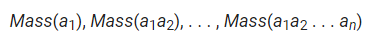

Another scoring approach, called the shared peaks count, simply counts the number of “tall” peaks annotated by a peptide, i.e., the annotated peaks with intensities exceeding a predefined threshold. Taking the intensity threshold 5 in our ongoing example, the shared peak count is 4, since the prefixes of XZZXX annotate the tall peaks with intensities 100, 500, and 9, and the suffixes annotate the tall peak with intensity 8. The first candidate peptide for DinosaurSpectrum (reproduced below) has shared peak count equal to 10, whereas the second candidate peptide has shared peak count equal to 6.



*To achieve this goal, we will convert peptides and spectra into vectors, then define a scoring function that is the dot product of these vectors.*

First, given an amino acid string Peptide = a1 . . . an of length n, we will represent its prefix masses using a binary peptide vector Peptide' with Mass(Peptide) coordinates. This vector contains a 1 at each of the n prefix coordinates

Converting a Peptide into a Peptide Vector Problem: Convert a peptide into a peptide vector.

- Input: An amino acid string Peptide.
- Output: The peptide vector Peptide'.

Code Challenge: Solve the Converting a Peptide into a Peptide Vector Problem.

- Input: An amino acid string P.
- Output: The peptide vector of P (in the form of space-separated integers).

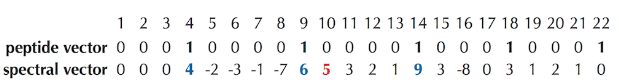

In [8]:
_amino_acid_by_mass_ = {4:"X", 5:"Z", 57:"G", 71:"A", 87:"S", 97:"P", 99:"V", 101:"T", 103:"C", 113:"L", 114:"N", 115:"D", 128:"Q", 129:"E", 131:"M", 137:"H", 147:"F", 156:"R", 163:"Y", 186:"W"}

_mass_by_amino_acid_ = {"X":4, "Z":5, "G":57, "A":71, "S":87, "P":97, "V":99, "T":101, "C":103, "L":113, "N":114, "D":115, "Q":128, "E":129, "M":131, "H":137, "F":147, "R":156, "Y":163, "W":186, "I":113, "K":128}

In [16]:
import numpy as np
peptide = 'VTTQNGSVYDASERWLDWFWIGNGACGVRQIPHDNYTV'

def peptide_vector(peptide, amino_acid_by_mass):
  pre_peptide = []
  current_mass = 0
  for amino_acid in peptide:
      if amino_acid in amino_acid_by_mass:
          current_mass += (amino_acid_by_mass[amino_acid])
          pre_peptide.append(current_mass)
  peptide_mass = sum([amino_acid_by_mass[aa] for aa in peptide])

  pep_vector = np.zeros(peptide_mass)

  for mass in pre_peptide:
    pep_vector[mass-1] = 1
  return pep_vector


vector = peptide_vector(peptide, _mass_by_amino_acid_)
print(' '.join(map(str, vector.astype(int))))


0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [18]:
def peptide_from_vector(peptide_vector):
    # Split input string into a list of integers
    binary_vector = list(map(int, peptide_vector.split()))

    # Identify the prefix masses based on the binary vector
    prefix_masses = []
    for i, value in enumerate(binary_vector):
        if value == 1:
            prefix_masses.append(i + 1)  # Use i + 1 for mass (1-based index)

    # Reconstruct the peptide from prefix masses
    peptide = []
    current_mass = 0

    for mass in prefix_masses:
        # Calculate the mass of the next amino acid to add
        amino_acid_mass = mass - current_mass
        if amino_acid_mass in _amino_acid_by_mass_:
            peptide.append(_amino_acid_by_mass_[amino_acid_mass])
            current_mass = mass
        else:
            return "No valid peptide found"  # In case there's no valid amino acid for the mass

    return ''.join(peptide)

# Sample Input
input_vector = "0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1"
output_peptide = peptide_from_vector(input_vector)
print(output_peptide)  # Expected output: XZZXX

NEWEWQTRTSCYEHNDQVYRQWYQRQQVRGSW
